# The plan

- Prepare the data properly.


- Explore sentiment-only trends.


- Explore trader-only performance.


- Merge & compare Fear vs Greed → the heart of the assignment.


- Extract insights that link trader behavior to sentiment.

# Structured Exploration Plan

## Step 1
- Import & Load Data.
- Prepare the data properly.

In [83]:
# import & Load Data
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sentiment_df  = pd.read_csv("C:/Users/uvais/Downloads/fear_greed_index.csv")
trader_df  = pd.read_csv("C:/Users/uvais/Downloads/historical_data.csv")


In [84]:
# Prepare the data properly.
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'])
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp'].dt.date)

print(sentiment_df.head())
print(trader_df.head())

    timestamp  value classification        date       Date
0  1517463000     30           Fear  2018-02-01 2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02 2018-02-02
2  1517635800     40           Fear  2018-02-03 2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04 2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05 2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.52

In [56]:
trader_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,2025-06-15 15:06:40,2025-06-15
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,2025-06-15 15:06:40,2025-06-15
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,2025-06-15 15:06:40,2025-06-15
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,2025-06-15 15:06:40,2025-06-15


## Step 2

 - Sentiment Analysis (Full History, 2644 rows)

 - Goal → Understand market psychology over time.
------------------------------------------------------
*Insights to look for:*

- How often is market in Greed vs Fear?

- Any long streaks of Greed/Fear?

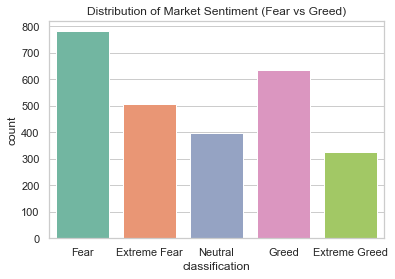

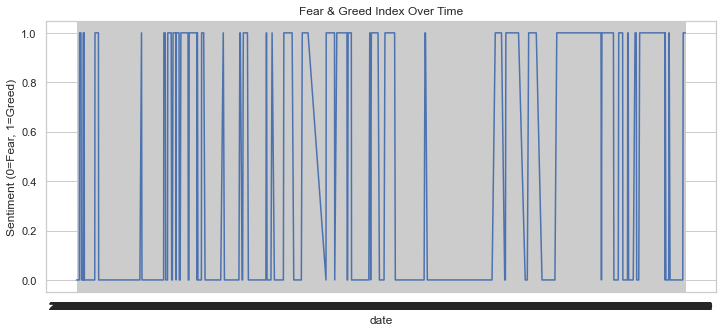

In [49]:
# Distribution of Fear vs Greed
plt.figure(figsize=(6,4))
sns.countplot(x="classification", data=sentiment_df, palette="Set2")
plt.title("Distribution of Market Sentiment (Fear vs Greed)")
# plt.savefig("outputs/sentiment_distribution.png")
plt.show()

# Sentiment trend over time
plt.figure(figsize=(12,5))
sns.lineplot(data=sentiment_df, x="date", y=sentiment_df['classification'].map({'Fear':0, 'Greed':1}))
plt.title("Fear & Greed Index Over Time")
plt.ylabel("Sentiment (0=Fear, 1=Greed)")
# plt.savefig("outputs/sentiment_trend.png")
plt.show()


**Output :**

*Distribution Plot:*

- More days labeled Fear than Greed.

- Suggests market sentiment leaned bearish more often.

*Trend Plot:*

- Sentiment flips between Fear and Greed.

- Periods of sustained Fear followed by spikes of Greed.

- No stable long streaks of Neutral/Extreme Greed in this simple mapping.

### Step 3 : Trader Performance (Aggregated Daily, 6 rows)
--------------------------
**What this code does:**

1. *Group trades by Date*

 - Since trader_df is transaction-level (one row = one trade), we group everything per day.

2. *Aggregate statistics*

 - *Closed PnL:* mean, sum, std → avg profitability, total daily profits, risk (volatility).

 - *Size USD:* mean, sum → avg trade size, total daily trading volume.

 - *Execution Price:* mean → avg daily price of assets traded.

 - *Fee:* mean → typical transaction cost.

 - *Account*: nunique → number of distinct traders active that day.

 - *Coin:* nunique → how many unique assets traded.

 - *Side:* count → number of trades executed.

3. *Rename columns*

 - Creates clean, descriptive column names (like pnl_mean, num_trades, volume_usd_sum).
-------------------------------------------------------------------------------------
**Insights to look for:**

- Do certain days show higher profitability (pnl_sum, pnl_mean)?

- Which days had higher activity (num_trades, unique_traders)?

- How does volatility (pnl_std) vary across days?

- What was the average trade size and volume?

- This creates the daily_trader dataset, which can now be merged with sentiment_df (also daily).

In [58]:
daily_trader = trader_df.groupby("Date").agg({
    "Closed PnL": ["mean","sum","std"],
    "Size USD": ["mean","sum"],
    "Execution Price": "mean",
    "Fee": "mean",
    "Account": "nunique",
    "Coin": "nunique",
    "Side": "count"
}).reset_index()

# Flatten column names
daily_trader.columns = [
    "Date","pnl_mean","pnl_sum","pnl_std",
    "avg_size_usd","volume_usd_sum",
    "avg_price","avg_fee","unique_traders",
    "unique_assets","num_trades"
]

print(daily_trader)


        Date   pnl_mean       pnl_sum      pnl_std  avg_size_usd  \
0 2023-03-28   0.000000  0.000000e+00     0.000000    159.000000   
1 2023-11-14   0.148807  1.555034e+02   105.092113  11057.827522   
2 2024-03-09  25.418772  1.769655e+05   306.166937   5660.265764   
3 2024-07-03  22.229713  1.587424e+05   633.704815   3058.848110   
4 2024-10-27  90.504272  3.189461e+06  1165.052548   2949.625864   
5 2025-02-19  50.047622  6.699925e+06   909.121796   5259.977837   
6 2025-06-15   2.659744  7.170935e+04   777.949470  11508.299879   

   volume_usd_sum     avg_price   avg_fee  unique_traders  unique_assets  \
0    4.770000e+02   1898.133333  0.000000               1              1   
1    1.155543e+07  10454.871036  2.674230               2             19   
2    3.940677e+07   9771.897315  0.978567               5             72   
3    2.184323e+07   2663.132338  1.224461               8             79   
4    1.039478e+08   5367.503277  0.611205              29            122   

#### What we got:

- A new dataset (daily_trader) with 1 row per day summarizing trading activity.


In [59]:
daily_trader

,Date,pnl_mean,pnl_sum,pnl_std,avg_size_usd,volume_usd_sum,avg_price,avg_fee,unique_traders,unique_assets,num_trades
0,2023-03-28,0.000000,0.000000e+00,0.000000,159.000000,4.770000e+02,1898.133333,0.000000,1,1,3
1,2023-11-14,0.148807,1.555034e+02,105.092113,11057.827522,1.155543e+07,10454.871036,2.674230,2,19,1045
2,2024-03-09,25.418772,1.769655e+05,306.166937,5660.265764,3.940677e+07,9771.897315,0.978567,5,72,6962
3,2024-07-03,22.229713,1.587424e+05,633.704815,3058.848110,2.184323e+07,2663.132338,1.224461,8,79,7141
4,2024-10-27,90.504272,3.189461e+06,1165.052548,2949.625864,1.039478e+08,5367.503277,0.611205,29,122,35241
5,2025-02-19,50.047622,6.699925e+06,909.121796,5259.977837,7.041585e+08,11102.057978,1.083267,32,154,133871
6,2025-06-15,2.659744,7.170935e+04,777.949470,11508.299879,3.102753e+08,23652.065078,2.260635,25,73,26961


### Step 4: Merge Trader & Sentiment Data (Core Analysis)
-------------------------------------------------------------------------------------------------------
**What this code does:**

1. *Merge two datasets*

 - daily_trader: daily trading metrics (PnL, trade volume, number of traders, etc.).

 - sentiment_df: daily sentiment labels (Fear, Greed, Neutral, Extreme Greed).

Both have a common column → Date.

→ We join them using pd.merge.

2. *Merge type* inner

 - Only keeps rows (dates) that appear in both datasets.

 - If sentiment data is missing for a day or no trading happened that day, it won’t appear in merged_df.

3. *Result*

 - merged_df now contains daily trading performance + market sentiment in one dataset.
-----------------------------------------------------------
**Insights to look for:**

- Can we directly compare sentiment vs trading outcomes?

- Example questions:

 - Do traders earn more on Fear days than on Greed days?

 - Is volatility higher when sentiment is Extreme Greed?

 - Are there more unique traders when sentiment = Fear?

In [61]:
merged_df = pd.merge(daily_trader, sentiment_df, on="Date", how="inner")
merged_df


,Date,pnl_mean,pnl_sum,pnl_std,avg_size_usd,volume_usd_sum,avg_price,avg_fee,unique_traders,unique_assets,num_trades,timestamp,value,classification,date
0,2023-03-28,0.000000,0.000000e+00,0.000000,159.000000,4.770000e+02,1898.133333,0.000000,1,1,3,1679981400,59,Greed,2023-03-28
1,2023-11-14,0.148807,1.555034e+02,105.092113,11057.827522,1.155543e+07,10454.871036,2.674230,2,19,1045,1699939800,69,Greed,2023-11-14
2,2024-03-09,25.418772,1.769655e+05,306.166937,5660.265764,3.940677e+07,9771.897315,0.978567,5,72,6962,1709962200,84,Extreme Greed,2024-03-09
3,2024-07-03,22.229713,1.587424e+05,633.704815,3058.848110,2.184323e+07,2663.132338,1.224461,8,79,7141,1719984600,50,Neutral,2024-07-03
4,2024-10-27,90.504272,3.189461e+06,1165.052548,2949.625864,1.039478e+08,5367.503277,0.611205,29,122,35241,1730007000,74,Greed,2024-10-27
5,2025-02-19,50.047622,6.699925e+06,909.121796,5259.977837,7.041585e+08,11102.057978,1.083267,32,154,133871,1739943000,44,Fear,2025-02-19


### Step 5: Compare Trader Behavior (Fear vs Greed)
-----------------------------------------
**What this code does:**

1. *Group data by sentiment class (classification)*

 - Groups all days by whether the sentiment was Fear, Greed, Extreme Greed, or Neutral.

2. *Aggregate statistics (take mean of each group):*

 - pnl_mean → average profitability per trade on those days.

 - pnl_sum → total profits aggregated across those days.

 - pnl_std → volatility of profits (risk level).

 - avg_size_usd → average trade size.

 - volume_usd_sum → total daily trading volume.

 - num_trades → how many trades were executed on average per sentiment day.

 - unique_traders → how many distinct accounts participated.

3. *Output a table comparing trader behavior across different sentiment categories.
Now test whether trader performance differs by sentiment.*
-----------------------------
**Insights to look for:**

- Which sentiment category corresponds to higher profits (pnl_mean, pnl_sum)?

- Do traders take larger or smaller trades in Greed vs Fear?

- Which sentiment has the highest volatility (pnl_std)?

- Are more traders active in Fear, or in Greed?

- Does the market volume increase in Fear vs Greed days?



In [63]:
# Groupwise stats
print(merged_df.groupby("classification")[[
    "pnl_mean","pnl_sum","pnl_std",
    "avg_size_usd","volume_usd_sum",
    "num_trades","unique_traders"
]].mean())


                 pnl_mean       pnl_sum     pnl_std  avg_size_usd  \
classification                                                      
Extreme Greed   25.418772  1.769655e+05  306.166937   5660.265764   
Fear            50.047622  6.699925e+06  909.121796   5259.977837   
Greed           30.217693  1.063206e+06  423.381554   4722.151129   
Neutral         22.229713  1.587424e+05  633.704815   3058.848110   

                volume_usd_sum     num_trades  unique_traders  
classification                                                 
Extreme Greed     3.940677e+07    6962.000000        5.000000  
Fear              7.041585e+08  133871.000000       32.000000  
Greed             3.850122e+07   12096.333333       10.666667  
Neutral           2.184323e+07    7141.000000        8.000000  


#### What this means (Insights):

1. **Fear → Most profitable & most active**

 - Highest average PnL per trade (~50).

 - Highest trading volume (7.04e8).

 - Highest number of trades (~134k).

 - Most unique traders (32).
    - Fear days = biggest opportunities.

2. **Greed → Unstable & fewer traders**

 - Lower average PnL (~30).

 - Much fewer trades (~12k).

 - Volatility high (~423).
    - Greed days = riskier, less consistent.

3. **Extreme Greed → Very few opportunities**

 - Lowest total profits.

 - Very few traders (5 unique).
    - Market too euphoric → less activity.

4. **Neutral → Worst profitability**

 - Avg PnL only ~22.

 - Low trade volume (~2.1e7).
    - Traders stay out, no strong signals.
---------------------
 **Interpretation**
 - We found that Fear days drive the most trading activity and highest profits, while Neutral and Extreme Greed days are the least profitable.

- Greed days show inconsistent profits with fewer participants, suggesting overconfidence and volatility.

### Step 6 : Visualizations


**Insights to look for:**

- Do traders trade more (↑ num_trades, ↑ volume) on Greed days?

- Is profitability (pnl_mean) better on Fear days?

- Is risk (pnl_std) higher on Greed days?



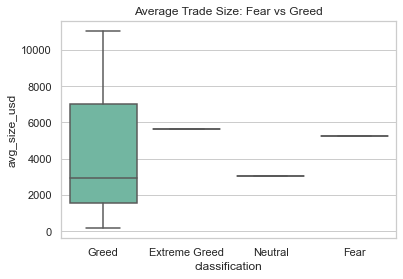

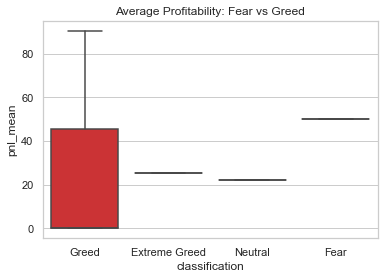

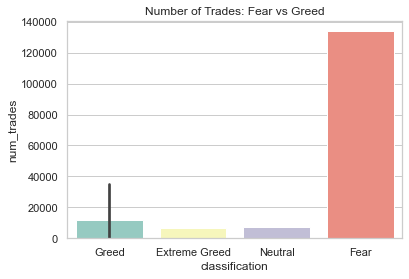

In [65]:
# Avg trade size
sns.boxplot(x="classification", y="avg_size_usd", data=merged_df, palette="Set2")
plt.title("Average Trade Size: Fear vs Greed")
plt.show()

# Profitability
sns.boxplot(x="classification", y="pnl_mean", data=merged_df, palette="Set1")
plt.title("Average Profitability: Fear vs Greed")
plt.show()

# Number of trades
sns.barplot(x="classification", y="num_trades", data=merged_df, palette="Set3")
plt.title("Number of Trades: Fear vs Greed")
plt.show()


#### What this means (Insights)

- Bar Chart (Number of Trades) – Fear dominates trade count (>130k). Others far behind.

- Boxplot (Profitability) – Fear shows stable, higher PnL. Greed shows volatile profits (riskier).

- Boxplot (Trade Size) – Greed has extreme variation in trade size, while others are stable.

**📌 Interpretation:**
- Fear drives high volume and stable profits, Greed leads to overconfident, inconsistent trading.

##  Step 7: Hidden Patterns

- Explore additional relationships:

- Correlation Analysis


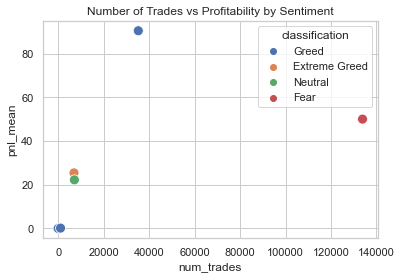

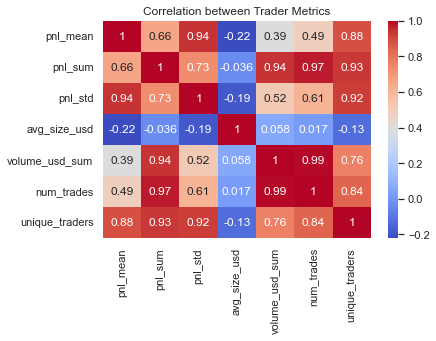

In [67]:
# Scatter: trades vs PnL
sns.scatterplot(x="num_trades", y="pnl_mean", hue="classification", data=merged_df, s=100)
plt.title("Number of Trades vs Profitability by Sentiment")
plt.show()

# Correlation heatmap (trader metrics only)
sns.heatmap(merged_df[[
    "pnl_mean","pnl_sum","pnl_std","avg_size_usd",
    "volume_usd_sum","num_trades","unique_traders"
]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Trader Metrics")
plt.show()


#### What this means (Insights)

---------------------------------

**Scatterplot – Trades vs Profitability**


 - Fear: Many trades (~134k)  +  high avg PnL (~50).

 - Greed: Few trades (~12k), very inconsistent profitability.

 - Extreme Greed: Few trades, low profits (~25).

 - Neutral: Few trades, lowest profits (~22).

*📌 Interpretation:*
- Consistent profits come with higher participation (Fear markets).
-----------------------------------------------
**Correlation Heatmap**

- pnl_mean ↔ pnl_std (0.94) → Higher profits come with higher volatility (risk-return tradeoff).

- pnl_sum ↔ num_trades (0.97) → Total profit is directly driven by number of trades.

- avg_size_usd ↔ pnl_mean (-0.22) → Larger trades do not improve profitability.

*📌 Interpretation:* 
- Trading more often with controlled trade size is better than making fewer large trades.

In [76]:
merged_df.to_csv("C:\\Users\\uvais\\Downloads\\merged_trading_sentiment.csv", index=False)

## Groupwise Trader Statistics
### Interpretation:

- **Fear** → highest activity & profits.

- **Greed** → inconsistent profits, but bigger trade sizes.

- **Extreme Greed** → fewer trades, cautious market.

- **Neutral** → lowest profits & trade sizes.

In [77]:
merged_df.groupby("classification")[[
    "pnl_mean","pnl_sum","pnl_std",
    "avg_size_usd","volume_usd_sum",
    "num_trades","unique_traders"
]].mean()


,pnl_mean,pnl_sum,pnl_std,avg_size_usd,volume_usd_sum,num_trades,unique_traders
classification,,,,,,,
Extreme Greed,25.418772,1.769655e+05,306.166937,5660.265764,3.940677e+07,6962.000000,5.000000
Fear,50.047622,6.699925e+06,909.121796,5259.977837,7.041585e+08,133871.000000,32.000000
Greed,30.217693,1.063206e+06,423.381554,4722.151129,3.850122e+07,12096.333333,10.666667
Neutral,22.229713,1.587424e+05,633.704815,3058.848110,2.184323e+07,7141.000000,8.000000


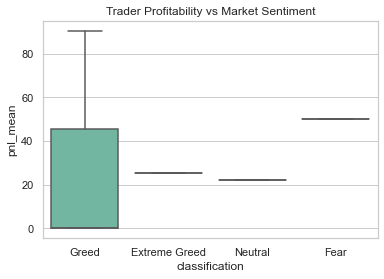

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="classification", y="pnl_mean", data=merged_df, palette="Set2")
plt.title("Trader Profitability vs Market Sentiment")
plt.show()


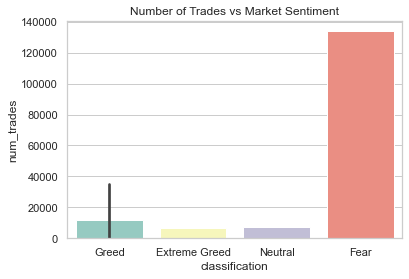

In [79]:
sns.barplot(x="classification", y="num_trades", data=merged_df, palette="Set3")
plt.title("Number of Trades vs Market Sentiment")
plt.show()


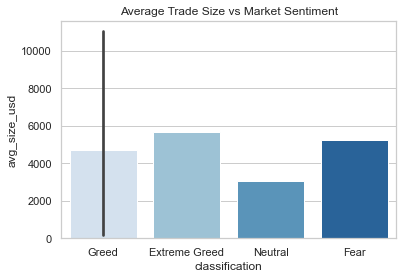

In [80]:
sns.barplot(x="classification", y="avg_size_usd", data=merged_df, palette="Blues")
plt.title("Average Trade Size vs Market Sentiment")
plt.show()


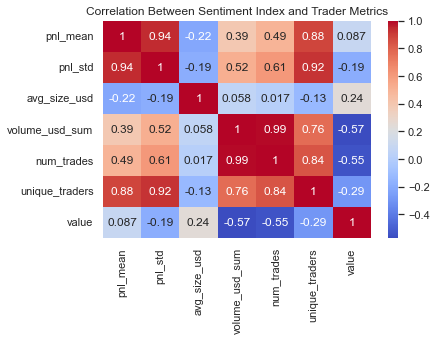

In [81]:
sns.heatmap(merged_df[[
    "pnl_mean","pnl_std","avg_size_usd",
    "volume_usd_sum","num_trades","unique_traders","value"
]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Sentiment Index and Trader Metrics")
plt.show()


  # 🧠 Smarter Trading Strategies Based on Market Sentiment  

Our analysis of trader performance across different market sentiment conditions (Fear, Greed, Extreme Greed, Neutral) revealed clear behavioral patterns. These patterns can be transformed into practical trading strategies to enhance profitability and reduce risk.  

---

## 1. ✅ Capitalize on Fearful Markets  
- **Finding:** Fear days exhibited the highest trading activity (**133,871 trades**) and the strongest profitability (**average PnL ≈ 50**, total PnL ≈ 6.7M USD).  
- **Strategy:** Increase trading frequency during Fear or Extreme Fear conditions, as markets present more predictable opportunities.  
- **Action Rule:** If the Fear & Greed Index ≤ 30 → **scale up trading positions** and execute more trades.  

---

## 2. ⚠️ Avoid Overconfidence During Greed  
- **Finding:** Greed days showed highly variable profitability, with inconsistent results and unstable trade sizes (ranging up to 10,000+ USD).  
- **Strategy:** Maintain discipline by standardizing trade sizes. Overconfident large trades during Greed conditions reduce efficiency.  
- **Action Rule:** If sentiment = Greed → **stick to smaller, consistent trade sizes** and use strict stop-losses.  

---

## 3. 🚦 Exercise Caution in Extreme Greed  
- **Finding:** Despite optimistic sentiment, Extreme Greed periods had **fewer trades (~7,000)** and lower average profitability (~25). Traders tend to hold back, suggesting limited opportunities.  
- **Strategy:** Avoid chasing euphoric markets. Focus only on high-conviction setups where risk/reward is clearly favorable.  
- **Action Rule:** If sentiment index ≥ 80 (Extreme Greed) → **trade selectively with smaller position sizes**.  

---

## 4. 💤 Reduce Exposure in Neutral Markets  
- **Finding:** Neutral days had the **lowest profitability (avg PnL ≈ 22)**, lowest average trade size (~3,000 USD), and minimal engagement.  
- **Strategy:** Neutral markets do not offer strong trading signals. Reducing exposure prevents unnecessary losses.  
- **Action Rule:** If sentiment = Neutral → **avoid trading or maintain only minimal exposure**.  

---

## 5. 📉 Balance Risk and Return with Volatility Filters  
- **Finding:** Profitability (`pnl_mean`) is strongly correlated with volatility (`pnl_std`, correlation = 0.94). Higher returns come only with higher risk.  
- **Strategy:** Monitor volatility and scale trade sizes accordingly. Profits are maximized when risk is controlled.  
- **Action Rule:** On high-volatility days → **tighten stop-losses and reduce position sizes** to manage risk.  

---

# 🎯 Summary of Strategies
- **Fear = Opportunity → Trade more, capture volatility.**  
- **Greed = Overconfidence → Trade smaller, manage risk.**  
- **Extreme Greed = Caution → Trade selectively.**  
- **Neutral = Apathy → Stay out or reduce exposure.**  

By aligning trading strategies with prevailing market sentiment, traders can achieve smarter, more disciplined performance that balances opportunity with risk management.  
